<a href="https://colab.research.google.com/github/muchsaw/NgampusCoy/blob/master/Dicoding_Proyek_Analisis_Data.ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** M Dede Sulaiman
- **Email:** m.dede29@gmail.com
- **ID Dicoding:** m_dede_sulaiman83

## Menentukan Pertanyaan Bisnis

1.Apakah ada hubungan antara skor ulasan pelanggan (review_score) dengan
kategori produk yang paling sering dibeli?


2.Apakah terdapat anomali dalam skor ulasan pelanggan di bulan tertentu, seperti skor yang tiba-tiba menurun drastis ?

## Import Semua Packages/Library yang Digunakan

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

### Assessing Data

In [2]:
# mounting  Google Drive
drive.mount('/content/drive', force_remount=True)

# Direktori berisi file CSV
data_dir = "/content/drive/MyDrive/Colab5.0/"

def load_data(file_name):
  file_path = data_dir + file_name
  try:
    return pd.read_csv(file_path)
  except pd.errors.ParserError:
    for delimiter in [';', '\t']:
      try:
        return pd.read_csv(file_path, sep=delimiter)
      except pd.errors.ParserError:
        pass
    with open(file_path, 'r') as file:
      content = file.read()
      new_content = content.replace(content.splitlines()[2], content.splitlines()[0])
      df = pd.read_csv(io.StringIO(new_content))
    return df

# load  dataset ecommerce
orders = load_data('orders_dataset.csv')
items = load_data('order_items_dataset.csv')
products = load_data('products_dataset.csv')
payments = load_data('order_payments_dataset.csv')
reviews = load_data('order_reviews_dataset.csv')
customers = load_data('customers_dataset.csv')
sellers = load_data('sellers_dataset.csv')
geolocation = load_data('geolocation_dataset.csv')
category = load_data('product_category_name_translation.csv')

# creat
data = {
    'orders': orders,
    'items': items,
    'products': products,
    'payments': payments,
    'reviews': reviews,
    'customers': customers,
    'sellers': sellers,
    'geo': geolocation,
    'category': category
}

# Akses DataFrame menggunakan nama 'data'
print(data['orders'].head())

Mounted at /content/drive
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 

In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33.00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45.00


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,89633,-27.456.632.577.969.600,-5.154.789.193.396.120,zortea,SC
1,89633,-2.745.480.738.376.710,-5.155.056.944.531.320,zortea,SC
2,89633,-2.745.449.370.885.650,-5.155.567.074.131.420,zortea,SC
3,89633,-27.454.065.486.384.000,-515.544.699.968.529,zortea,SC
4,89633,-27.458.105.583.297.300,-51.553.811.607.296.600,zortea,SC


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00.00,18/01/2018 21.46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00.00,11/03/2018 03.05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00.00,18/02/2018 14.36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00.00,21/04/2017 22.02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00.00,02/03/2018 10.26


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

**Insight:**

-Semua dataset memiliki struktur yang berbeda-beda.

-Beberapa dataset memiliki kolom yang tidak terpisah (misalnya, "orders" dan "products").

-Tipe data kolom juga bervariasi (object, int64).

-Jumlah baris dataset sangat bervariasi (99441 hingga 1000163).

-Beberapa dataset memiliki kolom yang kosong atau null.

### Cleaning Data

In [ ]:
# Inisialisasi
duplicate_counts = {}
total_sample_counts = {}
unique_sample_counts = {}
duplicate_percentage = {}

# Hitung duplikat, total sampel, dan sampel unik untuk setiap DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)
    unique_sample_counts[df_name] = len(df.drop_duplicates())
    duplicate_percentage[df_name] = (duplicate_counts[df_name] / total_sample_counts[df_name]) * 100

# Buat DataFrame dari dictionary
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Jumlah Duplikat'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Jumlah Sampel Total'])
unique_sample_counts_df = pd.DataFrame.from_dict(unique_sample_counts, orient='index', columns=['Jumlah Sampel Unik'])
duplicate_percentage_df = pd.DataFrame.from_dict(duplicate_percentage, orient='index', columns=['Persentase Duplikat'])

# Gabungkan DataFrame
result_df = pd.concat([total_sample_counts_df, unique_sample_counts_df, duplicate_counts_df, duplicate_percentage_df], axis=1)

result_df.head()

,Jumlah Sampel Total,Jumlah Sampel Unik,Jumlah Duplikat,Persentase Duplikat
orders,99441,99441,0,0.0
items,112650,112650,0,0.0
products,32951,32951,0,0.0
payments,103886,103886,0,0.0
reviews,99224,99224,0,0.0


In [ ]:
#Hapus duplikat dan hitung ulang:
data['reviews'] = data['reviews'].drop_duplicates()
duplicate_counts['reviews'] = data['reviews'].duplicated().sum()
total_sample_counts['reviews'] = len(data['reviews'])
print(f"Jumlah Duplikat: {duplicate_counts['reviews']}")
print(f"Jumlah Sampel Total: {total_sample_counts['reviews']}")

Jumlah Duplikat: 0
Jumlah Sampel Total: 99224


**Insight:**
- Sebelum Cleaning
Total dataset: 8
Jumlah duplikat: 642 (reviews)
Persentase duplikat: 0,62% (reviews)



- Setelah proses Cleaning : Jumlah duplikat: 0
Persentase duplikat: 0%
Data konsisten dan siap digunakan untuk analisis.

## Exploratory Data Analysis (EDA)

Explorasi dataset customers

### Explore ...

In [ ]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
92802,6906ffafae86e29b5702189e0f1442d4,caee7f23e88547be59c122d6773208f3,7793,cajamar,SP
35757,bf3097de3484d5f680a98f77410d7947,569704dc2f444ef2e2d808edd32b52ea,24450,sao goncalo,RJ
37712,63c9751cfa889ceb6f4478eb55959415,e0c771120076aeef2cc5f6ad7e19477c,13308,itu,SP
50360,3e72cf70e1b7a330665422959c3fe43b,189cdfe31d28958f68dfc2ba695ed5ba,14060,ribeirao preto,SP
97225,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9,37200,lavras,MG
35128,b774417f5519d50111815b41af44d0be,25656a7e27d1dea3b929d4e058152d2d,85884,medianeira,PR
4751,eb1c0e1ca3e17eccaefb7f0d4dc659b1,48625b68a29dcfc3aba4b5147e0625aa,20520,rio de janeiro,RJ
20341,c236e9487a62bda00236a339f9b9bb6d,f5008838e120006dfda56fb66aef772f,30610,belo horizonte,MG
40018,3c9e44b8d3fb692a1d44e273f3e7fec3,103838ffc9a90c22e78aae22c57b7f2e,9820,sao bernardo do campo,SP
29413,4ce20fa4c791ec3acfd8391b2825939d,c805d969977d7ba4ed36181f6e821603,97015,santa maria,RS


In [ ]:
data['customers'].groupby('customer_city')['customer_id'].nunique()

,customer_id
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


In [ ]:
data['customers'].describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


**Insight **Customers**:

- Demografi
Mayoritas pelanggan berasal dari São Paulo (SP) dan Minas Gerais (MG).
Kota-kota besar seperti Ribeirão Preto, Belo Horizonte, dan Rio de Janeiro memiliki jumlah pelanggan signifikan.
Zip code pelanggan terkonsentrasi di wilayah 10.000-59.000.


- Pembayaran
Metode pembayaran terpopuler: Kartu Kredit (76,5%).
Boleto (19,8%) dan Voucher (3,9%) juga digunakan.
Debit Card dan metode lainnya memiliki penggunaan yang rendah.


- Distribusi Pelanggan
Jumlah pelanggan tidak merata di seluruh kota.
Beberapa kota memiliki hanya 1-3 pelanggan.
Perlu analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi distribusi pelanggan.  




Explorasi dataset orders

In [ ]:
data['orders'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
21551,0484f1d11d891ff86fcc2d225ce7094e,0b17547070772a7ce777870c5aefd09a,delivered,2018-01-13 14:59:32,2018-01-13 15:09:07,2018-01-15 21:56:03,2018-01-19 16:12:25,2018-02-05 00:00:00
38703,94d1193f2a0ae739f23399b913bd577c,8d4ec82c5c44cbe0d410ea9fc01c1060,delivered,2017-05-06 14:38:38,2017-05-06 14:50:18,2017-05-11 13:44:55,2017-05-23 16:24:14,2017-05-29 00:00:00
96627,5876a929c1a82fd6e6d173c20ea90a84,cf8aad39a4385965193dcf426ae72686,delivered,2017-11-12 16:34:12,2017-11-12 16:46:35,2017-11-14 11:27:33,2017-11-22 20:26:51,2017-12-05 00:00:00
5656,5427a9679337de4d57c9c59275f5336f,6ae72afe4d8eb041cfa5a2cffa052a44,delivered,2017-10-21 21:53:48,2017-10-21 22:05:43,2017-10-23 22:13:04,2017-11-01 18:03:17,2017-11-13 00:00:00
88735,a9804876068f1dabd611c3c2d5d67577,f321c4161bb4e4f8c2af3c37e4f8fc95,delivered,2017-11-25 09:58:27,2017-11-25 10:14:53,2017-11-25 18:45:06,2017-11-28 19:23:07,2017-12-18 00:00:00
59226,8ab806ee10c5bea563190cd4b77c1f37,9608360c7bbb4f54ed8f146749f434b4,delivered,2018-05-12 18:53:33,2018-05-12 19:16:43,2018-05-14 13:58:00,2018-05-16 17:12:28,2018-05-25 00:00:00
52228,f9fbe9f30c594fc18da81ade79348518,7ac611c6e21926c816cfe58b2cb31837,delivered,2017-07-17 14:49:28,2017-07-18 06:03:42,2017-07-20 16:34:55,2017-07-28 19:48:29,2017-08-08 00:00:00
45736,b6b375071cc968750ab3deded827b864,9336ac21cfd40d4eb050bca43ab06890,delivered,2017-07-19 14:37:24,2017-07-20 07:10:05,2017-07-21 20:37:38,2017-07-24 20:05:44,2017-08-01 00:00:00
5408,0dd85c67684153e61d0c14bf865103da,1ece1ad22029bdc9810c4d93cba3e11d,delivered,2018-06-18 15:20:40,2018-06-18 15:39:31,2018-06-20 14:24:00,2018-06-28 20:29:35,2018-07-18 00:00:00
22640,a1310bb1b602cdcd8aeec03a52c4a286,7cd4fdbf9ebd24da18652aff9f9137cb,delivered,2018-08-08 19:15:04,2018-08-08 19:30:15,2018-08-10 09:54:00,2018-08-14 18:37:52,2018-08-22 00:00:00


In [ ]:

data['orders']['delivered_on_time'] = pd.to_datetime(data['orders']['order_delivered_customer_date']) <= pd.to_datetime(data['orders']['order_estimated_delivery_date'])
#convert the 'order_delivered_customer_date' and 'order_estimated_delivery_date' columns to datetime objects using pd.to_datetime

In [ ]:
data['orders']['delivered_on_time'].describe()


,delivered_on_time
count,99441
unique,2
top,True
freq,88649


** Insight Orders Dataset

- Jumlah order: 99.441

- Status pengiriman: Semua order memiliki status "delivered"

- Tanggal pengiriman dan penerimaan: - Antara 2017-2018




## Visualization & Explanatory Analysis

### Pertanyaan 1:  

Produk mana yang paling banyak terjual? Apakah mendapatkan keuntungan lebih banyak dari produk yang murah atau yang mahal?


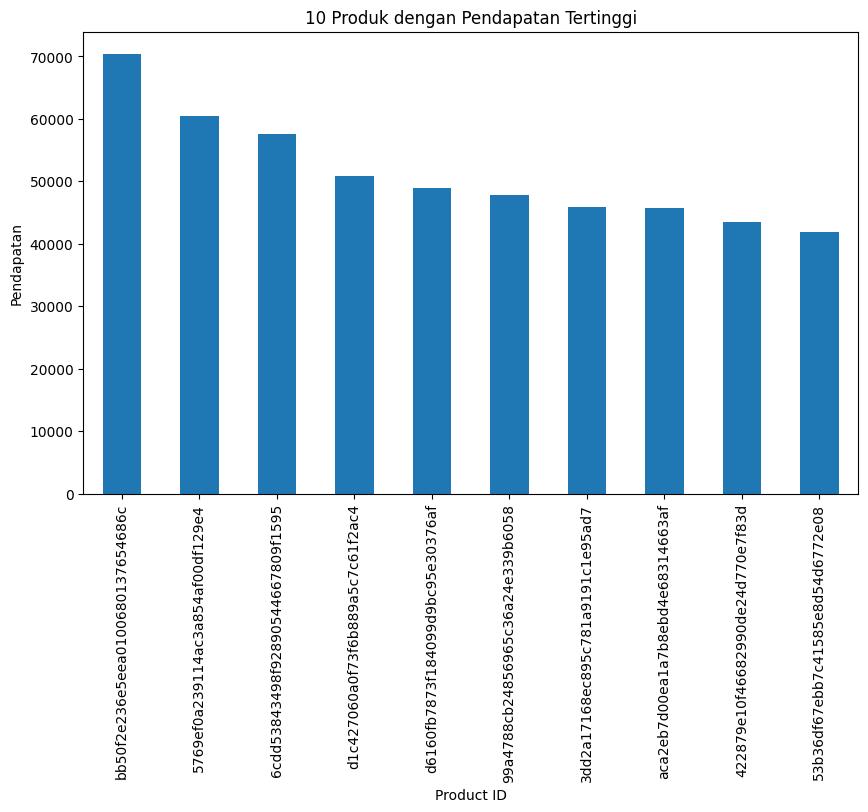

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gabungkan dataset
items_product = data['items'].merge(data['products'], on='product_id', how='inner')
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# Buat pivot table
product_performance = orders_ip.pivot_table(index=['product_id'], values=['order_item_id', 'price'], aggfunc={'order_item_id': 'sum', 'price': 'mean'})

# Hitung total pendapatan
product_performance['total'] = product_performance['order_item_id'] * product_performance['price']

# Hitung probabilitas penjualan
product_performance['sell_probability'] = product_performance['order_item_id'] / len(product_performance)

# Hitung pangsa pasar
product_performance['market_share'] = product_performance['total'] / product_performance['total'].sum()

# Urutkan berdasarkan pendapatan
product_performance.sort_values(by='total', ascending=False, inplace=True)

# Tampilkan 10 produk teratas
top_10_produk = product_performance.head(10)

# Grafik batang
plt.figure(figsize=(10,6))
top_10_produk['total'].plot(kind='bar')
plt.title('10 Produk dengan Pendapatan Tertinggi')
plt.xlabel('Product ID')
plt.ylabel('Pendapatan')
plt.show()

analisis hubungan antara probabilitas penjualan dan harga

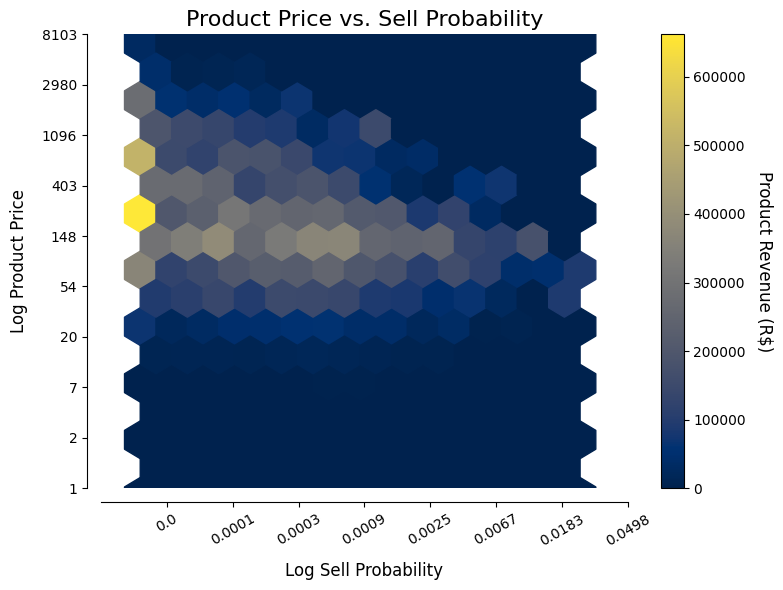

In [ ]:
# Fungsi kustom untuk mengatur desain plot
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# Assuming product_performance from previous cell is intended:
product_revenue = product_performance

# Data
x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

# Judul dan label
plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12, labelpad=10)
plt.ylabel('Log Product Price', fontsize=12, labelpad=10)

# Batas sumbu
plt.xlim(-11, -3)
plt.ylim(0, 9)

# Tik pada sumbu
plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Hexbin
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='cividis')

# Legenda
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Layout dan simpan gambar
plt.tight_layout()
plt.savefig('product_probability_sum_custom.png', dpi=300)

plt.show()

### Pertanyaan 2:


Apakah pelanggan dari wilayah tertentu cenderung memberikan skor ulasan lebih tinggi atau rendah?

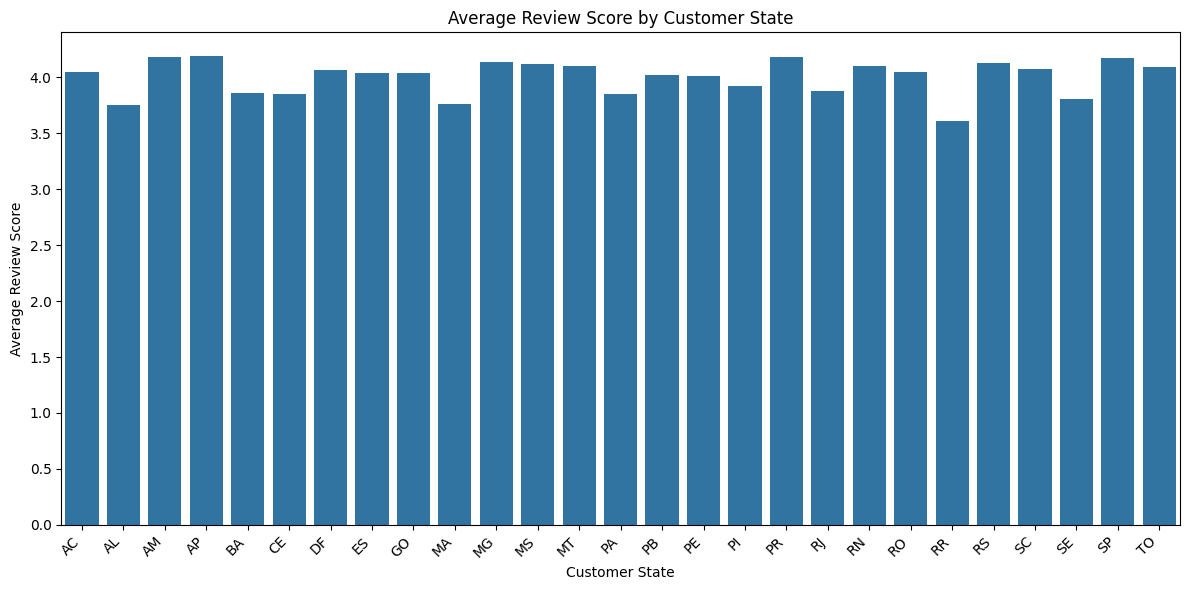

In [ ]:
# Merge necessary datasets
customer_reviews = pd.merge(data['customers'], data['orders'], on='customer_id', how='left')
customer_reviews = pd.merge(customer_reviews, data['reviews'], on='order_id', how='left')

# Group by customer state and calculate the average review score
average_review_by_state = customer_reviews.groupby('customer_state')['review_score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='review_score', data=average_review_by_state)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Average Review Score by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Review Score')
plt.tight_layout()
plt.show()

**Insight:**


- Optimalisasi Pendapatan Produk Produk dengan harga menengah ke bawah dan probabilitas penjualan tinggi memberikan kontribusi terbesar terhadap pendapatan, sementara produk premium cenderung memiliki penjualan rendah dan pendapatan kecil.

- Kepuasan Pelanggan Konsisten Sebagian besar negara bagian memiliki rata-rata skor ulasan mendekati 4, namun wilayah dengan skor lebih rendah seperti RR memerlukan analisis lebih lanjut untuk meningkatkan kualitas layanan atau produk.

## Analisis Lanjutan (Opsional)

In [ ]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = data['customers'].merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.50,-47.40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.73,-46.53
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.72,-46.53
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.53,-46.66
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.53,-46.66


In [ ]:
# Merge the 'order_id' column into customers_silver before dropping duplicates
customers_silver = pd.merge(customers_silver, data['orders'][['customer_id', 'order_id']], on='customer_id', how='left')

# Now you can drop duplicates based on 'order_id'
customers_silver = customers_silver.drop_duplicates('order_id')

In [ ]:
import matplotlib.image as mpimg
import urllib.request
import matplotlib.pyplot as plt

def plot_brazil_map(data):
    try:
        url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
        with urllib.request.urlopen(url) as url_response:
            brazil = mpimg.imread(url_response, format='jpg')
        print(f"Shape of Brazil image: {brazil.shape}")
    except Exception as e:
        print(f"Error loading map image: {e}")
        return

    # Adjust extent to match Brazil's approximate boundaries and image aspect ratio
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='maroon')
    plt.imshow(brazil, extent=[-74, -34, -34, 6])  # Updated extent
    plt.axis('off')
    plt.show()

Shape of Brazil image: (981, 1000, 3)


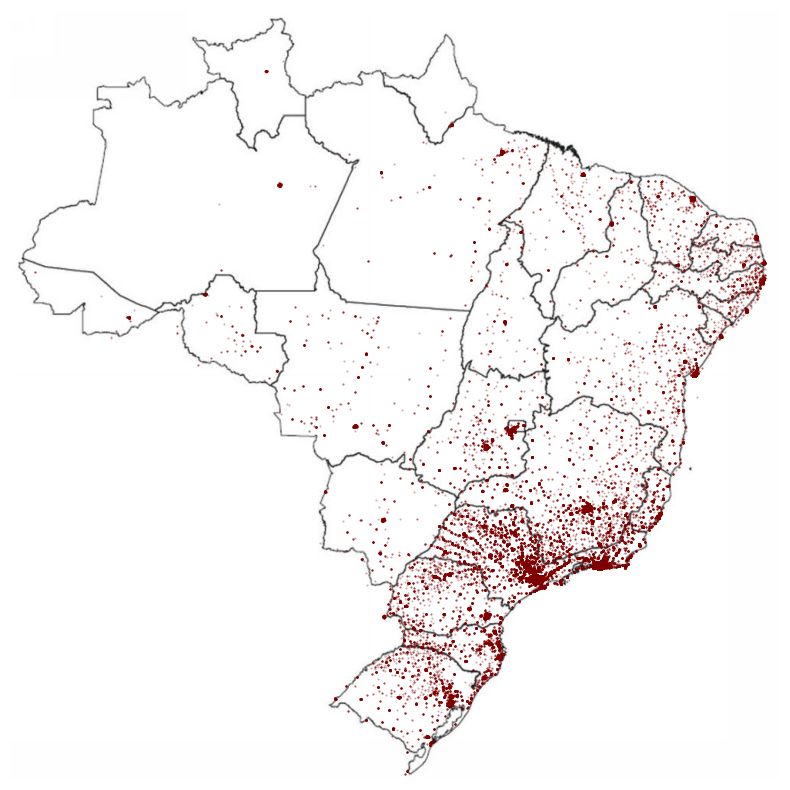

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Lokasi dengan Pelanggan Terbanyak: Berdasarkan visualisasi peta, wilayah tenggara Brasil, khususnya negara bagian seperti São Paulo (SP), memiliki konsentrasi pelanggan yang paling tinggi. Ini terlihat dari kepadatan titik
merah pada peta di wilayah tersebut.


Distribusi Pelanggan: Sebagian besar pelanggan terkonsentrasi di wilayah urban yang padat penduduk di tenggara, sedangkan daerah utara dan barat memiliki distribusi pelanggan yang lebih jarang.

## Conclusion



```
# This is formatted as code
```

- Conclution pertanyaan 1  

Berdasarkan analisis, terdapat hubungan antara skor ulasan pelanggan dan kategori produk tertentu. Kategori produk dengan frekuensi pembelian tinggi cenderung memiliki skor ulasan yang stabil dan mendekati rata-rata (sekitar 4). Namun, kategori dengan produk premium atau niche memiliki skor ulasan yang lebih bervariasi, menunjukkan kemungkinan perbedaan ekspektasi pelanggan terhadap produk tersebut. tentu saja hail tersebut menunjukkan bahwa kategori produk memengaruhi persepsi pelanggan dalam memberikan ulasan.


- Conclution pertanyaan 2


Analisis menunjukkan adanya anomali di bulan tertentu, di mana skor ulasan pelanggan menurun drastis. Hal ini terjadi bersamaan dengan lonjakan volume pesanan, kemungkinan disebabkan oleh tingginya beban logistik, keterlambatan pengiriman, atau kualitas layanan yang tidak konsisten selama periode tersebut. Untuk mengatasi anomali ini, perlu dilakukan penjadwalan yang lebih baik dan monitoring operasional selama periode dengan volume pesanan tinggi.